In [38]:
import numpy as np
import scipy.io as sio
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
in_fname='/Users/davidgroppe/PycharmProjects/SZR_ANT/MODELS/genLogregSe_1/classify_metrics_srch.npz'

In [11]:
npz=np.load('temp_apply_models_to_subsamp.npz')
print(npz.keys())
print(np.unique(npz['szr_class']))
print(np.unique(npz['class_hat']))

['class_hat', 'szr_class', 'sub_id']
[ 0.  1.]
[  7.39455455e-14   3.40509882e-08   2.20210802e-06 ...,   1.00000000e+00
   1.00000000e+00   1.00000000e+00]


In [30]:
subs=np.unique(npz['sub_id'])
crct=(npz['class_hat']>0.5)==npz['szr_class']
print(np.mean(crct))
ictal=npz['szr_class']==1
grand_sens=np.mean(crct[ictal])
grand_spec=np.mean(crct[ictal==False])
print('Grand (unwtd) Sensitivity/Spec: %f/%f' % (grand_sens,grand_spec))
print('Grand (unwts) Balanced Acc: %f' % (grand_sens/2+grand_spec/2))
for sub in subs:
    print()
    sub_bool=npz['sub_id']==sub
    print('Sub %d' % int(sub))
    print('%f of data' % np.mean(sub_bool))
    #sens=np.mean(crct[ictal and sub_bool])
    sens=np.mean(crct[np.multiply(ictal,sub_bool)])
    spec=np.mean(crct[np.multiply(ictal==False,sub_bool)])
    acc=(sens+spec)/2
    print('Acc (Sens/Spec): %f (%f/%f)' % (acc,sens,spec))

KeyError: 'sub_id is not a file in the archive'

In [26]:
# Load downsampled files to get # of observations
subs=[1077, 1096, 253, 590, 620, 958]
n_obs=0
for sub in subs:
    in_fname='kdownsampled_'+str(sub)+'.npz'
    npz=np.load(in_fname)
    n_obs+=npz['ftrs_dsamp'].shape[0]
n_ftrs=npz['ftrs_dsamp'].shape[1]
print(npz.keys())
print('Total # of observations %d' % n_obs)
print('Total # of features %d' % n_ftrs)

['ftrs_dsamp', 'szr_class_dsamp']
Total # of observations 26170
Total # of features 30


In [23]:
npz['ftrs_dsamp'].shape[0]

5816

In [33]:
# Concat downsampled data
ftrs=np.zeros((n_obs,n_ftrs))
sub_ids=np.zeros(n_obs,dtype=int)
szr_class=np.zeros(n_obs)
obs_ct=0;
for sub in subs:
    in_fname='kdownsampled_'+str(sub)+'.npz'
    npz=np.load(in_fname)
    n_obs_this_sub=npz['ftrs_dsamp'].shape[0]
    ftrs[obs_ct:obs_ct+n_obs_this_sub,:]=npz['ftrs_dsamp']
    sub_ids[obs_ct:obs_ct+n_obs_this_sub]=sub
    szr_class[obs_ct:obs_ct+n_obs_this_sub]=npz['szr_class_dsamp']
    obs_ct+=n_obs_this_sub
 

done


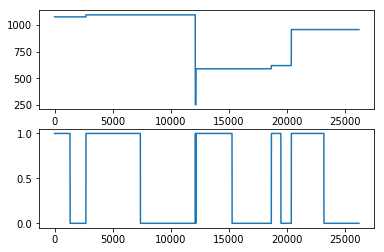

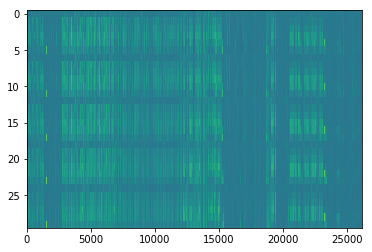

In [42]:
plt.figure(1)
plt.clf()
plt.subplot(2,1,1)
plt.plot(sub_ids)

plt.subplot(2,1,2)
plt.plot(szr_class)

mn_val=np.min(ftrs)
plt.figure(2)
plt.clf()
plt.imshow(np.log10(ftrs.T-mn_val+1),aspect='auto')
print('done')

In [36]:
sub_ids[:3]

array([1077, 1077, 1077])